<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#查看数据集" data-toc-modified-id="查看数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>查看数据集</a></span></li></ul></div>

In [15]:
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation  
from keras.optimizers import SGD  
from keras.datasets import mnist  
import numpy 
import matplotlib.pyplot as plt

## 查看数据集

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# 使用Keras自带的mnist工具读取数据（第一次需要联网）

(60000, 28, 28)
<class 'numpy.ndarray'>


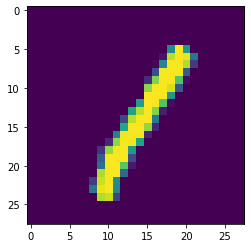

In [23]:
plt.imshow(X_train[23])
print(X_train.shape)
print(type(X_train[0]))

In [26]:
print("训练集数据大小：", X_train.shape)
print("测试集数据大小：", X_test.shape)
print("训练集标签", Y_train.shape)
print("测试集标签", Y_test.shape)

训练集数据大小： (60000, 28, 28)
测试集数据大小： (10000, 28, 28)
训练集标签 (60000, 10)
测试集标签 (10000, 10)


In [3]:
'''
    第一步：选择模型
'''
model = Sequential()

In [4]:
'''
   第二步：构建网络层
'''
model.add(Dense(500,input_shape=(784,))) # 输入层，28*28=784  
model.add(Activation('tanh')) # 激活函数是tanh  
model.add(Dropout(0.5)) # 采用50%的dropout

model.add(Dense(500)) # 隐藏层节点500个  
model.add(Activation('tanh'))  
model.add(Dropout(0.5))

model.add(Dense(10)) # 输出结果是10个类别，所以维度是10  
model.add(Activation('softmax')) # 最后一层用softmax作为激活函数

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
__________

In [10]:
'''
   第三步：编译
'''
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # 优化函数，设定学习率（lr）等参数  
model.compile(loss='categorical_crossentropy', optimizer=sgd) # 使用交叉熵作为loss函数

In [11]:
'''
   第四步：训练
   .fit的一些参数
   batch_size：对总的样本数进行分组，每组包含的样本数量
   epochs ：训练次数
   shuffle：是否把数据随机打乱之后再进行训练
   validation_split：拿出百分之多少用来做交叉验证
   verbose：屏显模式 0：不输出  1：输出进度  2：输出每次的训练结果
'''
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 使用Keras自带的mnist工具读取数据（第一次需要联网）
# 由于mist的输入数据维度是(num, 28, 28)，这里需要把后面的维度直接拼起来变成784维  
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int) 
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

model.fit(
    X_train, 
    Y_train,
    batch_size=200,
    epochs=50,
    shuffle=True,
    verbose=1,
    validation_split=0.3)
model.evaluate(X_test, Y_test, batch_size=200, verbose=0)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 11s 250us/step - loss: 1.1929 - val_loss: 0.5454
Epoch 2/50
42000/42000 [==============================] - 8s 186us/step - loss: 0.9417 - val_loss: 0.5062
Epoch 3/50
42000/42000 [==============================] - 8s 192us/step - loss: 0.8633 - val_loss: 0.4640
Epoch 4/50
42000/42000 [==============================] - 8s 179us/step - loss: 0.8091 - val_loss: 0.4521
Epoch 5/50
42000/42000 [==============================] - 7s 177us/step - loss: 0.7655 - val_loss: 0.4087
Epoch 6/50
42000/42000 [==============================] - 8s 180us/step - loss: 0.7297 - val_loss: 0.3965
Epoch 7/50
42000/42000 [==============================] - 8s 180us/step - loss: 0.6909 - val_loss: 0.3932
Epoch 8/50
42000/42000 [==============================] - 8s 179us/step - loss: 0.6823 - val_loss: 0.3827
Epoch 9/50
42000/42000 [==============================] - 8s 180us/step - loss: 0.7090 - val_loss: 0.

0.23831116840243338

In [12]:
'''
    第五步：输出
'''
print("test set")
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose=0)
print("")
print("The test loss is %f" % scores)
result = model.predict(X_test,batch_size=200,verbose=0)

result_max = numpy.argmax(result, axis = 1)
test_max = numpy.argmax(Y_test, axis = 1)

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print("")
print("The accuracy of the model is %f" % (true_num/len(result_bool)))

test set

The test loss is 0.238311

The accuracy of the model is 0.929500
